In [1]:
import math
import numpy as np
import pandas as pd

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [32]:
class NeuralNetwork():
    def __init__(self, x_shape, y_shape, n_node=4):
        self.weights1 = np.random.rand(x_shape[1], n_node)
        self.weights2 = np.random.rand(n_node, y_shape[1])
        self.output = np.zeros(y_shape[1])
    
    def feedforward(self, x):
        self.input = x
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
    def backpropagation(self, y, learning_rate):
        self.y = y
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        self.d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        self.d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += self.d_weights1*learning_rate
        self.weights2 += self.d_weights2*learning_rate
    
    def calculate_loss(self):
        # using sum of square error
        loss = np.dot((self.y - self.output).T, (self.y - self.output))[0][0]
        return loss
    
    def train(self, x_data, y_data, epochs, learning_rate=0.01):
        history = {'loss':[], 'epochs': []}
        for i in range(epochs):
            self.feedforward(x_data)
            self.backpropagation(y_data, learning_rate)
            loss = self.calculate_loss()
            history['loss'].append(loss)
            history['epochs'].append(i)
            print('epoch {} ==> loss: {:.3f}'.format(i+1, loss))
        return history
    
    def predict(self, x):
        self.feedforward(x)
        return self.output

In [4]:
# For demonstration, we will use dummy data
# suppose that we want to model binary equation y = x1 and (x2 or x3)
x1 = [1, 0, 0, 1, 1, 1]
x2 = [1, 0, 1, 0, 0, 1]
x3 = [1, 0, 1, 1, 0, 0]
y = [1, 0, 0, 1, 0, 1]
dataset = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
dataset

,x1,x2,x3,y
0,1,1,1,1
1,0,0,0,0
2,0,1,1,0
3,1,0,1,1
4,1,0,0,0
5,1,1,0,1


In [5]:
x_data = dataset[['x1', 'x2', 'x3']].to_numpy()
y_data = dataset['y'].to_numpy().reshape(-1, 1)
print('x_data:\n', x_data.shape)
print('y_data:\n', y_data.shape)

x_data:
 (6, 3)
y_data:
 (6, 1)


In [6]:
x = x_data[1]
print(sigmoid(x))
print(sigmoid_derivative(x))

[0.5 0.5 0.5]
[0.25 0.25 0.25]


In [57]:
NN_model = NeuralNetwork(x_data.shape, y_data.shape, n_node=5)
history = NN_model.train(x_data, y_data, epochs=50, learning_rate=1)

epoch 1 ==> loss: 1.762
epoch 2 ==> loss: 1.563
epoch 3 ==> loss: 1.539
epoch 4 ==> loss: 1.506
epoch 5 ==> loss: 1.496
epoch 6 ==> loss: 1.484
epoch 7 ==> loss: 1.479
epoch 8 ==> loss: 1.473
epoch 9 ==> loss: 1.470
epoch 10 ==> loss: 1.466
epoch 11 ==> loss: 1.463
epoch 12 ==> loss: 1.459
epoch 13 ==> loss: 1.456
epoch 14 ==> loss: 1.452
epoch 15 ==> loss: 1.448
epoch 16 ==> loss: 1.443
epoch 17 ==> loss: 1.438
epoch 18 ==> loss: 1.432
epoch 19 ==> loss: 1.426
epoch 20 ==> loss: 1.418
epoch 21 ==> loss: 1.410
epoch 22 ==> loss: 1.399
epoch 23 ==> loss: 1.388
epoch 24 ==> loss: 1.374
epoch 25 ==> loss: 1.358
epoch 26 ==> loss: 1.339
epoch 27 ==> loss: 1.318
epoch 28 ==> loss: 1.294
epoch 29 ==> loss: 1.267
epoch 30 ==> loss: 1.239
epoch 31 ==> loss: 1.209
epoch 32 ==> loss: 1.179
epoch 33 ==> loss: 1.150
epoch 34 ==> loss: 1.123
epoch 35 ==> loss: 1.099
epoch 36 ==> loss: 1.077
epoch 37 ==> loss: 1.060
epoch 38 ==> loss: 1.046
epoch 39 ==> loss: 1.035
epoch 40 ==> loss: 1.027
epoch 41 

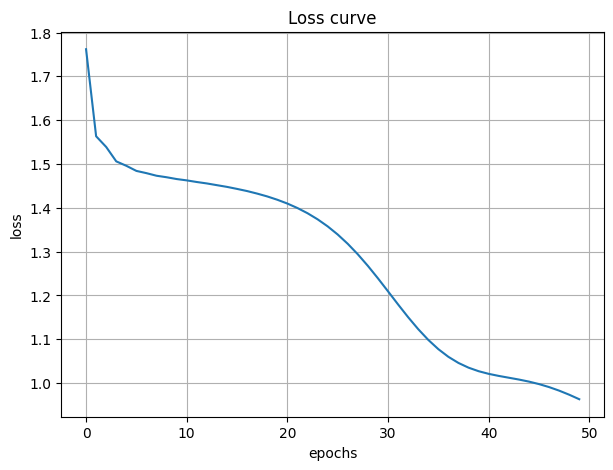

In [58]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(7, 5))
ax.plot(history['epochs'], history['loss'])
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.set_title('Loss curve')
ax.grid()

In [62]:
# prediction
NN_model.predict([1, 1, 1])

array([0.66379765])